In [9]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [10]:
house=pd.read_csv('kc_house_data.csv')
house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## Exploratory Data Analysis

In [4]:
house.shape


(21613, 21)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


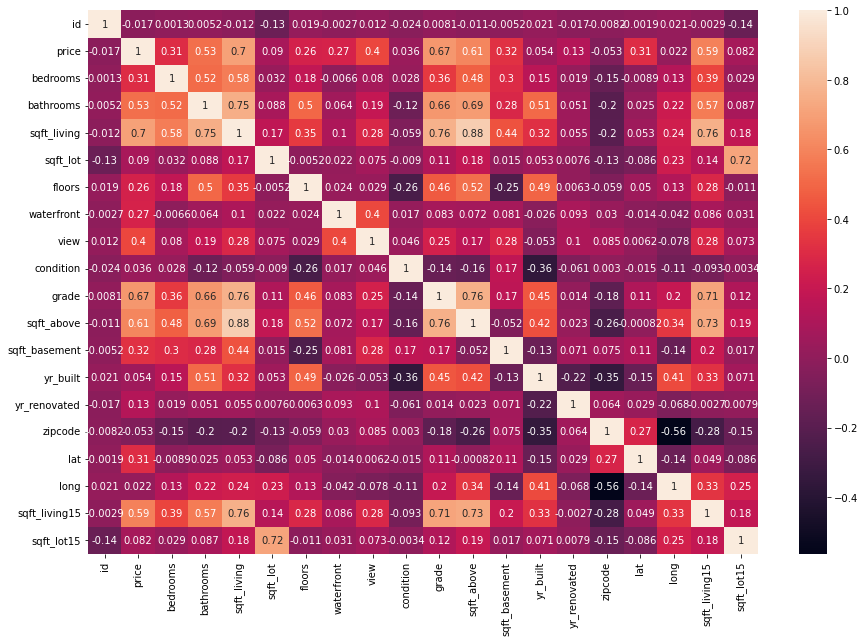

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(house.corr(),annot=True)
plt.show()

In [128]:
house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


## Selecting the best features for independent variables and target variables

In [11]:
X=house[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_lot15','lat','long']]
Y=house['price']

## Splitting the dataset into train and test set

In [12]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [13]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_lot15,lat,long
19642,4,2.50,2070,4270,2.0,0,0,3,8,2070,0,4610,47.7730,-122.265
8626,3,2.25,1400,6970,2.0,0,0,3,8,1400,0,8140,47.5420,-122.184
6954,5,3.00,2190,4900,2.0,0,0,5,7,1490,700,4606,47.6892,-122.386
20242,4,2.50,2547,4800,2.0,0,0,3,9,2547,0,4800,47.2592,-122.194
10376,5,3.50,4060,8309,2.0,0,0,3,9,2960,1100,11711,47.7570,-122.228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,3,2.25,1920,9672,2.0,0,0,4,8,1920,0,10125,47.6233,-122.046
8006,3,1.00,1240,3600,1.5,0,0,3,7,1240,0,3600,47.5986,-122.298
17745,3,2.25,1780,7332,2.0,0,0,3,7,1780,0,7625,47.3593,-122.051
17931,2,1.00,1150,5000,1.0,0,0,4,7,1050,100,4320,47.6846,-122.317


In [140]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_lot15,lat,long
3834,2,1.00,1050,6317,1.5,0,0,4,7,1050,0,9616,47.7364,-121.981
1348,4,2.25,2040,9565,1.0,0,0,3,8,1400,640,8580,47.7356,-122.335
20366,4,2.50,2500,4000,2.0,0,0,3,8,2500,0,4300,47.5902,-122.311
16617,5,2.00,2360,19899,1.0,0,0,4,7,2360,0,19998,47.3299,-122.046
20925,3,3.00,1670,4440,1.0,0,0,3,7,1670,0,4622,47.1948,-121.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,3,1.75,1520,5500,1.5,0,0,5,7,1520,0,5500,47.5839,-122.383
2747,5,3.00,2970,10335,2.0,0,0,3,9,2970,0,10335,47.5980,-122.019
15565,3,2.50,3440,103672,2.0,0,0,3,9,3440,0,112820,47.3895,-121.986
21238,3,2.50,1572,4000,2.0,0,0,3,8,1572,0,5175,47.2615,-122.198


### standardising the values 

In [14]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()


In [15]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [143]:
X_train_std

array([[ 0.69608634,  0.49894508, -0.00810266, ..., -0.29371924,
         1.54311059, -0.36553755],
       [-0.40802008,  0.173745  , -0.74457445, ..., -0.16524962,
        -0.12793194,  0.20797682],
       [ 1.80019275,  1.14934525,  0.12380274, ..., -0.29386481,
         0.93690555, -1.2222689 ],
       ...,
       [-0.40802008,  0.173745  , -0.32687403, ..., -0.18399236,
        -1.44957466,  1.14967325],
       [-1.51212649, -1.45225542, -1.01937736, ..., -0.3042734 ,
         0.90362938, -0.73371962],
       [-0.40802008, -1.45225542, -0.68961387, ..., -0.17980708,
        -0.2783981 , -1.11606253]])

In [144]:
X_test_std

array([[-1.51212649, -1.45225542, -1.12929852, ..., -0.11153258,
         1.278348  ,  1.64530296],
       [ 0.69608634,  0.173745  , -0.04107901, ..., -0.14923641,
         1.27256084, -0.86116726],
       [ 0.69608634,  0.49894508,  0.46455834, ..., -0.30500127,
         0.22074447, -0.69123707],
       ...,
       [-0.40802008,  0.49894508,  1.49781727, ...,  3.64443868,
        -1.23110936,  1.60990083],
       [-0.40802008,  0.49894508, -0.55551005, ..., -0.27315682,
        -2.157055  ,  0.10885088],
       [-0.40802008,  1.14934525,  0.92622723, ...,  0.20014272,
        -0.31673804, -1.28599272]])

## linear regression model

In [16]:
model1=LinearRegression()

In [17]:
model1.fit(X_train_std,Y_train)

LinearRegression()

In [18]:
Y_pred1=model1.predict(X_test_std)

## Ridge model

In [19]:
model2 = Ridge(alpha=0.5)
model2.fit(X_train_std, Y_train)
Y_pred2=model2.predict(X_test_std)

## Random Forest Regression model

In [20]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor(n_estimators=100,random_state=0)
model3.fit(X_train_std,Y_train)
Y_pred3=model3.predict(X_test_std)

### evaluating the performance of our model

In [21]:
from sklearn.metrics import mean_absolute_error,r2_score

### Model 1

In [22]:
print('mean absolute error: ',mean_absolute_error(Y_test,Y_pred1))
print('R square score: ',r2_score(Y_test,Y_pred1))

mean absolute error:  131679.0952676155
R square score:  0.6861305951086307


### Model 2

In [23]:
print('mean absolute error: ',mean_absolute_error(Y_test,Y_pred2))
print('R square score: ',r2_score(Y_test,Y_pred2))

mean absolute error:  131644.1186096774
R square score:  0.6860094618883126


### Model 3

In [24]:
print('mean absolute error: ',mean_absolute_error(Y_test,Y_pred3))
print('R square score: ',model3.score(X_test_std,Y_test))

mean absolute error:  69467.65099580998
R square score:  0.8759854317631539


## So our model 3 is giving the best performance in predicting the price of the house